## Logistic Regression

1. [Import Dataset](#1)
1. [Cross Validation](#2)
1. [Logistic Regression](#3)
1. [Data Visualization](#4)
1. [Predict](#5)

<a id = "1"></a><b>
### Import Dataset

In [21]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<a id = "2"></a><b>
### Cross Validation

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
scaller = StandardScaler()

In [6]:
x = df.drop(["Outcome"], axis = 1)
y = df["Outcome"]

In [7]:
x = scaller.fit_transform(x)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 66)

<a id = "3"></a><b>
### Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [24]:
log_reg = LogisticRegression(random_state = 0)
log_reg = log_reg.fit(x_train, y_train)
predict = log_reg.predict(x_test)
accuracy = accuracy_score(predict, y_test)

In [25]:
accuracy

0.7755905511811023

<a id = "4"></a><b>
### Data Visualization

In [13]:
!pip install sns

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [16]:
predict_new = {"predict": predict}
predict = pd.DataFrame(predict_new)

x_test = pd.DataFrame(x_test, columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
x_test.reset_index(drop=True, inplace=True)

x_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.547919,-0.966911,0.046245,-0.221835,-0.692891,-0.595578,-1.168412,-0.956462
1,-0.844885,-0.747831,-0.057150,0.029077,-0.692891,-0.608270,1.881908,-0.956462
2,-0.547919,-0.653939,0.046245,1.973647,-0.197966,1.079756,0.619498,-0.701198
3,-0.844885,-0.372265,-0.574128,-0.159107,0.314325,-0.443275,-0.763716,-0.956462
4,-1.141852,-0.591345,0.304734,0.154533,-0.692891,-4.060474,0.302385,-1.041549


In [17]:
new_data = pd.concat([x_test["BMI"], predict], axis = 1)
new_data.head()

,BMI,predict
0,-0.595578,0
1,-0.608270,0
2,1.079756,0
3,-0.443275,0
4,-4.060474,0


In [18]:
new_x = new_data["BMI"]
new_y = new_data["predict"]

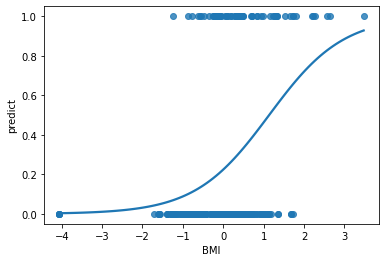

In [19]:
sns.regplot(x = new_x, y = new_y, data = new_data, logistic = True, ci=None)
plt.show()

<a id = "5"></a><b>
### Predict

In [29]:
input_data1 = (6,148,72,35,0,33.6,0.627,50)
input_data2 = (1,85,66,29,0,26.6,0.351,31)

In [30]:
#Changing Input Data As Numpy Array
input_data_array = np.asarray(input_data1)

# Reshape the data as we are predicting for only one instance
input_data_reshape = input_data_array.reshape(1,-1)

# Standardize the data
std_data = scaller.transform(input_data_reshape)

# Prediction
prediction = log_reg.predict(std_data)
#print(prediction)

if prediction == 0:
    print('Person is Not Diabetic')
else:
    print('Person is Diabetic')

Person is Diabetic


In [31]:
#Changing Input Data As Numpy Array
input_data_array = np.asarray(input_data2)

# Reshape the data as we are predicting for only one instance
input_data_reshape = input_data_array.reshape(1,-1)

# Standardize the data
std_data = scaller.transform(input_data_reshape)

# Prediction
prediction = log_reg.predict(std_data)
#print(prediction)

if prediction == 0:
    print('Person is Not Diabetic')
else:
    print('Person is Diabetic')

Person is Not Diabetic
